# Using package

Estimated Mean (MLE): 4.792306032104664
Estimated Standard Deviation (MLE): 1.8072322316309144


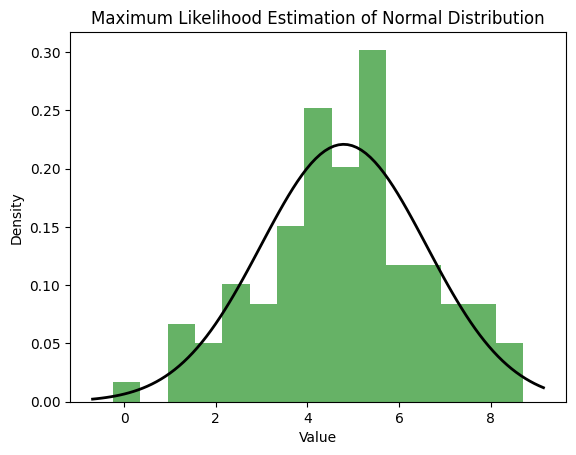

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate synthetic data from a normal distribution
np.random.seed(42)
data = np.random.normal(loc=5, scale=2, size=100)  # mean=5, std=2, n=100

# Define the likelihood function for a normal distribution
def likelihood(mu, sigma):
    return np.prod(stats.norm.pdf(data, mu, sigma))

# Define the log-likelihood function
def log_likelihood(params):
    mu, sigma = params
    return -np.sum(stats.norm.logpdf(data, mu, sigma))

# Initial guesses for mu and sigma
initial_params = [0, 1]

# Optimize the log-likelihood function
from scipy.optimize import minimize
result = minimize(log_likelihood, initial_params, bounds=[(None, None), (1e-5, None)])

# Extract the estimated parameters
mu_mle, sigma_mle = result.x

# Print the results
print(f"Estimated Mean (MLE): {mu_mle}")
print(f"Estimated Standard Deviation (MLE): {sigma_mle}")

# Plot the data and the estimated distribution
plt.hist(data, bins=15, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu_mle, sigma_mle)
plt.plot(x, p, 'k', linewidth=2)
plt.title('Maximum Likelihood Estimation of Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

# From scratch

Estimated Mean (mu): 5.11961603106897
Estimated Standard Deviation (sigma): 4.063322035719588


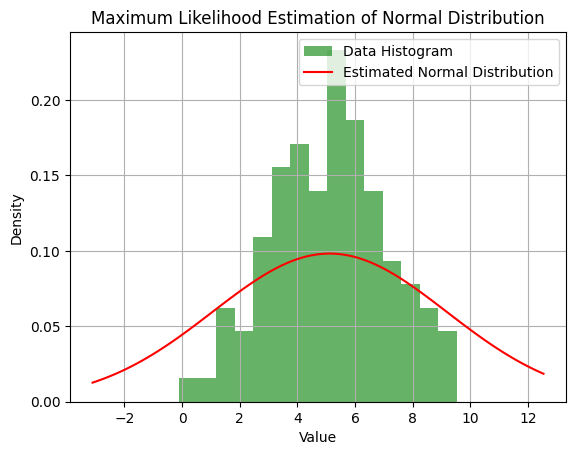

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the negative log-likelihood function for a normal distribution
def negative_log_likelihood(params, data):
    mu, sigma = params
    if sigma <= 0:
        return float('inf')

    n = len(data)
    log_likelihood = -n * np.log(sigma) - 0.5 * np.sum(((data - mu) / sigma) ** 2)
    return -log_likelihood

# Gradient of the negative log-likelihood
def gradient(params, data):
    mu, sigma = params
    n = len(data)

    dL_dmu = (1/sigma) * np.sum(data - mu)
    dL_dsigma = -n/sigma + (1/sigma**2) * np.sum((data - mu) ** 2)

    return np.array([-dL_dmu, -dL_dsigma])

# Gradient descent optimization
def gradient_descent(data, initial_params, learning_rate=0.01, max_iter=1000, tol=1e-6):
    params = np.array(initial_params)

    for _ in range(max_iter):
        grad = gradient(params, data)
        new_params = params - learning_rate * grad

        if np.linalg.norm(new_params - params) < tol:
            break

        params = new_params

    return params

# Generate some sample data from a normal distribution
np.random.seed(0)
data = np.random.normal(loc=5, scale=2, size=100)

# Initial guesses for mu and sigma
initial_params = [0, 1]

# Optimize the parameters using gradient descent
mu_est, sigma_est = gradient_descent(data, initial_params)

# Print estimated parameters
print(f"Estimated Mean (mu): {mu_est}")
print(f"Estimated Standard Deviation (sigma): {sigma_est}")

# Visualization

plt.hist(data, bins=15, density=True, alpha=0.6, color='g', label='Data Histogram')

x = np.linspace(min(data) - 3, max(data) + 3, 100)
# Calculate the estimated normal distribution
pdf = (1 / (sigma_est * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu_est) / sigma_est) ** 2)

# Plot the estimated normal distribution
plt.plot(x, pdf, 'r-', label='Estimated Normal Distribution')
plt.title('Maximum Likelihood Estimation of Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()